## libraries

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import cvlib
from cvlib.object_detection import draw_bbox

In [2]:
resim = cv2.imread('car.jpg')
cv2.imshow('Hello World', resim)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
print ('Heiht of image', int(resim.shape[0]),'pixels')
print ('Width of image', int(resim.shape[1]),'pixels')

Heiht of image 750 pixels
Width of image 1500 pixels


In [5]:
checkBoard = np.zeros((9,9))
checkBoard[0::2,1::2]=1
checkBoard[1::2,0::2]=1
print(checkBoard)

[[0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]]


## hem resmin orijinalini hem de gri olarak gorelim

In [6]:
resim = cv2.imread("car.jpg")
cv2.imshow("Original",resim)
cv2.waitKey()

gray_image= cv2.cvtColor(resim,cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale",gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
## sadece gri hali
resim = cv2.imread("car.jpg",0)
cv2.imshow("Grayscale",resim)
cv2.waitKey()
cv2.destroyAllWindows()

## RGB oranları

In [8]:
resim = cv2.imread("car.jpg")
B,G,R = resim[0,0]
B,G,R = resim[10,50]
print(B,G,R)
print(resim.shape)

115 139 157
(750, 1500, 3)


## car.jpg için renk uzayının farklı bileşenlerini görselleştirelim.

In [10]:
resim = cv2.imread("car.jpg")
hsv_resim = cv2.cvtColor(resim ,cv2.COLOR_BGR2HSV)  ## BGR renk uzayından HSV renk uzayına dönüşür.(Hue, Saturation ve Value )

cv2.imshow("HSV image",hsv_resim[:,:,:])
cv2.imshow("Hue channel",hsv_resim[:,:,0])   ##  Hue, renk tonunu temsil eder.
cv2.imshow("Saturation channel",hsv_resim[:,:,1])   ## renk doygunluğunu temsil eder.
cv2.imshow("Value channel",hsv_resim[:,:,2])   ## Value, parlaklığı temsil eder.
cv2.waitKey()
cv2.destroyAllWindows()

## resmimizi kanallarına ayıralım ve Kırmızı (Red), Yeşil (Green) ve Mavi (Blue) kanalları görselleştirelim.

In [11]:
resim = cv2.imread("car.jpg")
B,G,R =cv2.split(resim)
print(B.shape)
cv2.imshow("Red",R)
cv2.imshow("Green",G)
cv2.imshow("Blue",B)
cv2.waitKey(0)
cv2.destroyAllWindows()
merged = cv2.merge([B,G,R])
cv2.imshow("Merged",merged)
merged= cv2.merge([B+100,G,R+100])
cv2.imshow("Merged with Blue Amplified",merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

(750, 1500)


## kenar tespiti ve kontur(dış hatlar ve ya sınır) bulma işlemleri

In [12]:
image = cv2.imread("car.jpg")
cv2.imshow("Input Image",image)
cv2.waitKey(0)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray,30,200)
cv2.imshow("Canny Edges",edged)
cv2.waitKey(0)

contours,hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.imshow("Canny Edges After Contouring",edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

cv2.drawContours(image,contours,-1,(0,255,0),thickness=2)

cv2.imshow("Contours",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 930


## Resmi okuyup araba sayısına bakalım

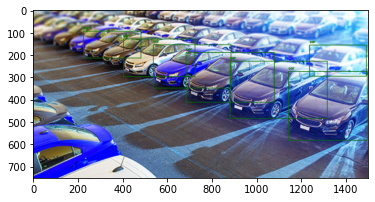

Number of cars in this image are 8


In [25]:
resim = cv2.imread("car.jpg")
box, label, count = cvlib.detect_common_objects(resim)
output = draw_bbox(resim, box, label, count)
plt.imshow(output)
plt.show()
print("Number of cars in this image are " + str(label.count('car')))

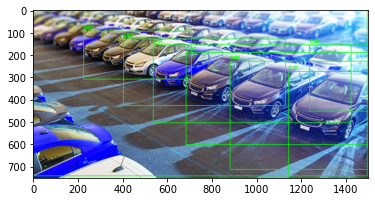

Number of cars in this image are: 8


In [26]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

# Resmi yükleme
resim = cv2.imread("car.jpg")

# Nesneleri tespit etme
boxes, labels, counts = cv.detect_common_objects(resim)

# BoundingBox'ları çizme
output = resim.copy()
for box, label in zip(boxes, labels):
    x, y, w, h = box
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(output, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Çıktıyı gösterme
plt.imshow(output)
plt.show()

# Araba sayısını yazdırma
car_count = labels.count('car')
print(f"Number of cars in this image are: {car_count}")
